# FStrings EXPERT

Esta tabla contiene la información adicional de las sentencias de tipo JoinedStr (Strings formateados).  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'fstring__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('fstrings')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-02 11:42:47.256208 Data cache files found ...
2024-06-02 11:42:47.261181 Data cache files successfully loaded!!
The dataset contains 4977 (22.59%) instances for BEGINNER class and 17053 (77.41%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'fstrings'
TABLE_FEATURES = ['fstring__number_of_elements', 'fstring__constants_pct', 'fstring__expressions_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (17053, 3)
As we can see the downloaded data contains a total of 17053 instances. For each instance we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17053 entries, 4977 to 22029
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fstring__number_of_elements  17053 non-null  int64  
 1   fstring__constants_pct       17053 non-null  float64
 2   fstring__expressions_pct     17053 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 532.9 KB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.68%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

fstring__number_of_elements    0
fstring__constants_pct         0
fstring__expressions_pct       0
dtype: int64

In [6]:
print_empty_cols(X)

fstring__number_of_elements
---------------------------
0 instancias no tienen un valor para la columna fstring__number_of_elements


fstring__constants_pct
----------------------
0 instancias no tienen un valor para la columna fstring__constants_pct


fstring__expressions_pct
------------------------
0 instancias no tienen un valor para la columna fstring__expressions_pct




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
fstring__number_of_elements,17053.0,3.161438,2.000536,0.0,2.000000,3.0,4.000000,44.0
fstring__constants_pct,17053.0,0.554168,0.155964,0.0,0.500000,0.5,0.666667,1.0
fstring__expressions_pct,17053.0,0.445773,0.155943,0.0,0.333333,0.5,0.500000,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "fstring__number_of_elements": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max:44.0
    "fstring__constants_pct": [(0.0, 0.5), (0.5, 0.5), (0.5, 0.67), (0.67, inf)],  # min: 0.0 max: 1.0
    "fstring__expressions_pct": [(0.0, 0.33), (0.33, 0.5), (0.5, 0.5), (0.5, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['fstring__number_of_elements'], 10))
print(get_statistics(X_copy, ['fstring__constants_pct'], 10))
print(get_statistics(X_copy, ['fstring__expressions_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
fstring__number_of_elements  count  percentage
                  [2.0_3.0)   6471   37.946402
                  [3.0_4.0)   4782   28.041987
                  [4.0_inf]   4662   27.338298
                  [0.0_2.0)   1138    6.673313

fstring__constants_pct  count  percentage
             [0.5_0.5]   8835   51.809066
            [0.5_0.67)   5973   35.026095
             [0.0_0.5)   1388    8.139330
            [0.67_inf]    857    5.025509

fstring__expressions_pct  count  percentage
               [0.5_0.5]   8835   51.809066
              [0.33_0.5)   5973   35.026095
               [0.5_inf]   1387    8.133466
              [0.0_0.33)    858    5.031373

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (17053, 3)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

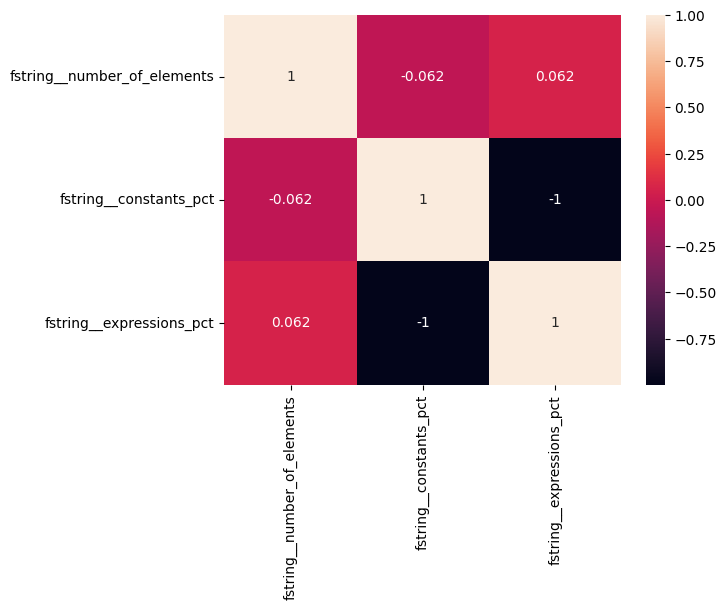

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica y 2 porcentuales) se hara un analisis detallado

### Variable number_of_elements (1/3)
Esta variable representa el número de elementos del JoinedStr. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 43. Con una media de 3.16.

<Axes: ylabel='fstring__number_of_elements'>

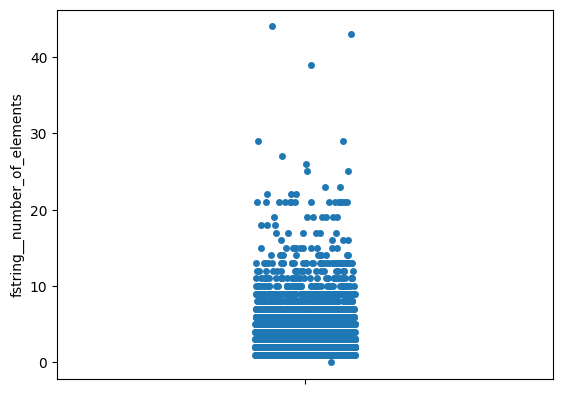

In [11]:
sns.stripplot(X['fstring__number_of_elements'])

### IMPORTANTE
Los valores maximos estan muy alejados de los siguientes

In [12]:
print_outliers_for_df_column(X, 'fstring__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8492646650834517
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.8464630522744763,93.62828482380525]
-3.0IQR: 0 instancias tienen un valor para fstring__number_of_elements inferior a -4.0 (Q1-3*IQR) para fstring__number_of_elements. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para fstring__number_of_elements inferior a -1.0 (Q1-1.5*IQR) para fstring__number_of_elements. Representando un 0.0% del total de instancias.
+1.5IQR: 441 instancias tienen un valor para fstring__number_of_elements superior a 7.0 (Q3+1.5*IQR) para fstring__number_of_elements. Representando un 2.586% del total de instancias.
+3.0IQR: 163 instancias tienen un valor para fstring__number_of_elements superior a 10.0 (Q3-3*IQR) para fstring__number_of_elements. Representando un 0.9558% del total de instancias.
L: 11

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 10.0 (Con un MC de 84 usamos Tuckey Extremo)

In [13]:
X[X['fstring__number_of_elements'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct
count,163.000000,163.000000,163.000000
mean,15.288343,0.514568,0.485432
std,5.512863,0.034310,0.034310
min,11.000000,0.333333,0.454545
25%,12.000000,0.500000,0.461538
50%,13.000000,0.526316,0.473684
75%,17.000000,0.538462,0.500000
max,44.000000,0.545455,0.666667


### Variable constants_pct (2/3)
Esta variable representa la proporción de los valores usados para parametrizar el JoinedStr que son constantes. Toma los valores de 0.0 - 1.0. La media es 0.55.

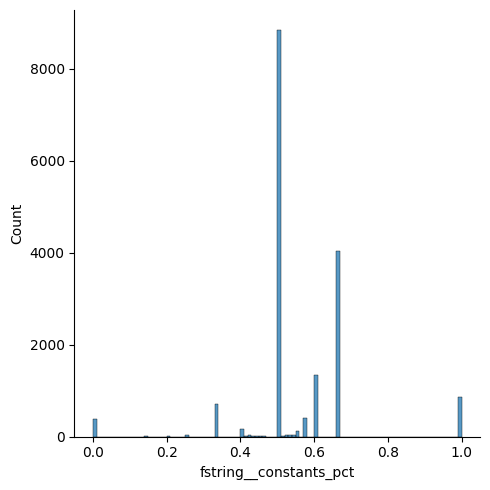

In [14]:
sns.displot(X['fstring__constants_pct'], bins=[i / 100 for i in range(0, 101)])

In [15]:
print_outliers_for_df_column(X, 'fstring__constants_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3977978684213841
Rango valores atípicos extremos (Tukey): [-5.960464477539063e-08,1.1666667461395264]
Rango valores atípicos leves (Tukey): [0.2499999701976776,0.916666716337204]
Rango valores atípicos extremos (Fixed BoxPlot): [0.4378737566687578,1.8940656074078148]
-3.0IQR: 0 instancias tienen un valor para fstring__constants_pct inferior a -5.960464477539063e-08 (Q1-3*IQR) para fstring__constants_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 401 instancias tienen un valor para fstring__constants_pct inferior a 0.2499999701976776 (Q1-1.5*IQR) para fstring__constants_pct. Representando un 2.351% del total de instancias.
+1.5IQR: 857 instancias tienen un valor para fstring__constants_pct superior a 0.916666716337204 (Q3+1.5*IQR) para fstring__constants_pct. Representando un 5.026% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para fstring__constants_pct superior a 1.1666667461395264 (Q3-3*IQR) p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es menor de 0.249 o mayor que 0.917 (Con un MC de 39 usamos Tuckey)

In [16]:
X[(X['fstring__constants_pct'] < 0.249) | (X['fstring__constants_pct'] > 0.917)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct
count,1258.000000,1258.000000,1258.000000
mean,1.174881,0.683075,0.316130
std,0.692916,0.463873,0.463558
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,9.000000,1.000000,1.000000


### Variable expressions_pct (3/3)
Esta variable representa la proporción de valores usados para parametrizar el JoinedStr que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.44.

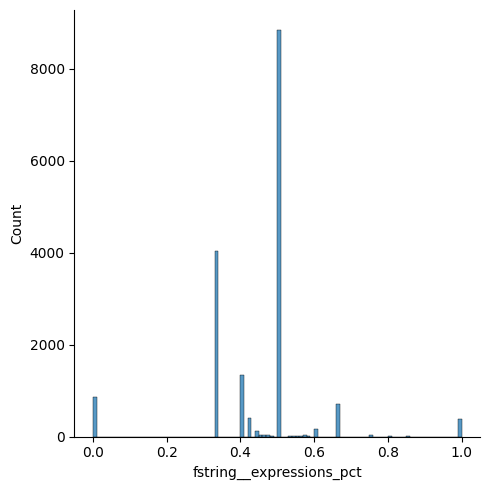

In [17]:
sns.displot(X['fstring__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [18]:
print_outliers_for_df_column(X, 'fstring__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.02711346745491028
Rango valores atípicos extremos (Tukey): [-0.16666662693023682,0.9999999701976776]
Rango valores atípicos leves (Tukey): [0.08333335816860199,0.7499999850988388]
Rango valores atípicos extremos (Fixed BoxPlot): [0.10596673658626593,0.7786383565915586]
-3.0IQR: 0 instancias tienen un valor para fstring__expressions_pct inferior a -0.16666662693023682 (Q1-3*IQR) para fstring__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 858 instancias tienen un valor para fstring__expressions_pct inferior a 0.08333335816860199 (Q1-1.5*IQR) para fstring__expressions_pct. Representando un 5.031% del total de instancias.
+1.5IQR: 400 instancias tienen un valor para fstring__expressions_pct superior a 0.7499999850988388 (Q3+1.5*IQR) para fstring__expressions_pct. Representando un 2.346% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para fstring__expressions_pct superior a 0.9999999701976

Describimos los valores de las variables de la tabla, cuando el valor de la variable es menor de 0.084 o mayor que 0.749

In [19]:
X[(X['fstring__expressions_pct'] < 0.084) | (X['fstring__expressions_pct'] > 0.749)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct
count,1296.000000,1296.000000,1296.000000
mean,1.257716,0.670377,0.328852
std,0.832692,0.462824,0.462539
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,9.000000,1.000000,1.000000


## Multivariate

TODO: isolation forest algorithm

In [20]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct,fstring__expertise_level
7100,27,0.518518,0.481482,EXPERT
10293,29,0.413793,0.586207,EXPERT
10726,25,0.440000,0.560000,EXPERT
10727,23,0.434783,0.565217,EXPERT
12034,29,0.413793,0.586207,EXPERT
16196,39,0.512821,0.487179,EXPERT
16198,43,0.488372,0.511628,EXPERT
16370,25,0.520000,0.480000,EXPERT
21080,23,0.521739,0.478261,EXPERT


### IMPORTANTE
Analizar los outliers de la tabla